In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("movies.csv")
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
movies = df.iloc[:,5:]
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [5]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [6]:
from mlxtend.frequent_patterns import apriori,association_rules

In [7]:
Apriori = apriori(movies,min_support = 0.005,use_colnames=True,max_len=2)
Apriori

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [8]:
Apriori.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [9]:
Apriori.sort_values('support',ascending=False,inplace=True)

In [10]:
Apriori.head()

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Gladiator, Patriot)"
10,0.5,"(Gladiator, Sixth Sense)"


In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


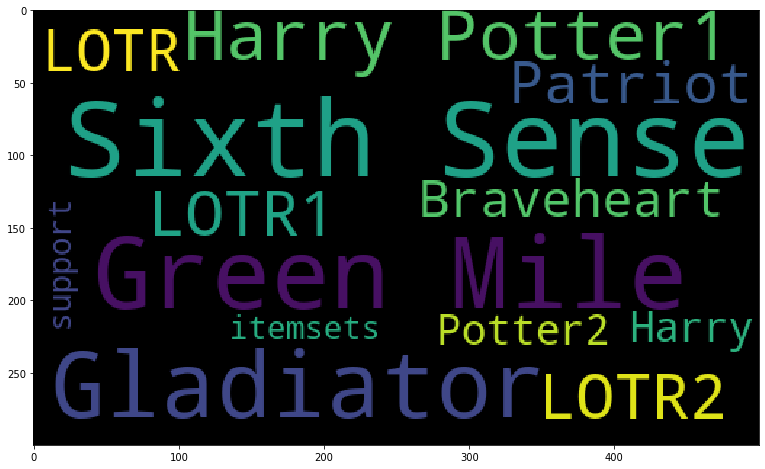

In [12]:
from wordcloud import WordCloud
plt.figure(figsize=(13,13))
wordcloud = WordCloud(font_path=None,width=500,height=300,max_words=100,background_color='black').generate(str(Apriori))
plt.imshow(wordcloud)

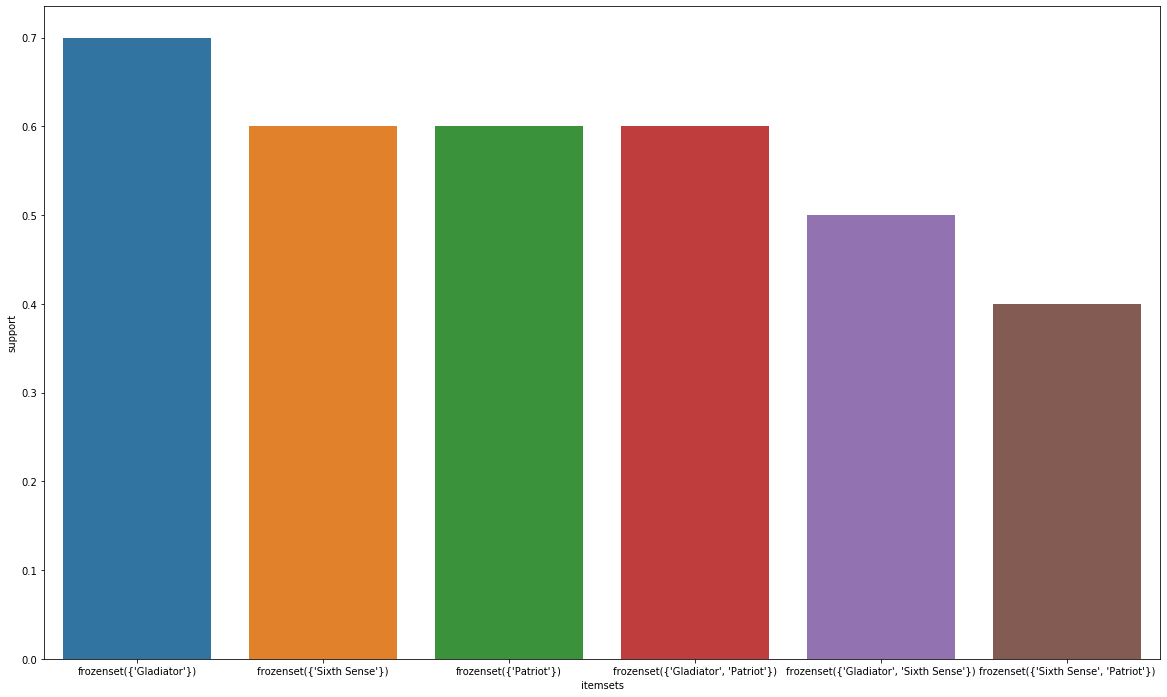

In [13]:
plt.figure(figsize=(20,12))
sns.barplot(x=Apriori.itemsets[0:6],y=Apriori.support[0:6],data=Apriori)

In [14]:
Association = association_rules(Apriori,metric='lift',min_threshold=1)
Association.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
3,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [15]:
Association.sort_values('lift',ascending=False,inplace=True)
Association.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
30,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
17,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.5,5.0,0.08,1.8
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf


In [16]:
# Eliminating Redundancy in rules

def eliminate_red(i):
    return(sorted(list(i)))

In [17]:
X = Association.antecedents.apply(eliminate_red) + Association.consequents.apply(eliminate_red)
X

16    [Harry Potter2, Harry Potter1]
8                     [LOTR2, LOTR1]
30                [Green Mile, LOTR]
17    [Harry Potter1, Harry Potter2]
9                     [LOTR1, LOTR2]
31                [LOTR, Green Mile]
19            [Harry Potter1, LOTR2]
10               [LOTR2, Green Mile]
11               [Green Mile, LOTR2]
23            [LOTR1, Harry Potter1]
22            [Harry Potter1, LOTR1]
14       [Green Mile, Harry Potter1]
15       [Harry Potter1, Green Mile]
21               [LOTR1, Green Mile]
20               [Green Mile, LOTR1]
18            [LOTR2, Harry Potter1]
7          [Green Mile, Sixth Sense]
25               [LOTR, Sixth Sense]
24               [Sixth Sense, LOTR]
6          [Sixth Sense, Green Mile]
13             [Patriot, Braveheart]
12             [Braveheart, Patriot]
0               [Gladiator, Patriot]
1               [Patriot, Gladiator]
26           [Gladiator, Braveheart]
27           [Braveheart, Gladiator]
28                 [Gladiator, LOTR]
2

In [18]:
Rules_set = list(X)
Rules_set

[['Harry Potter2', 'Harry Potter1'],
 ['LOTR2', 'LOTR1'],
 ['Green Mile', 'LOTR'],
 ['Harry Potter1', 'Harry Potter2'],
 ['LOTR1', 'LOTR2'],
 ['LOTR', 'Green Mile'],
 ['Harry Potter1', 'LOTR2'],
 ['LOTR2', 'Green Mile'],
 ['Green Mile', 'LOTR2'],
 ['LOTR1', 'Harry Potter1'],
 ['Harry Potter1', 'LOTR1'],
 ['Green Mile', 'Harry Potter1'],
 ['Harry Potter1', 'Green Mile'],
 ['LOTR1', 'Green Mile'],
 ['Green Mile', 'LOTR1'],
 ['LOTR2', 'Harry Potter1'],
 ['Green Mile', 'Sixth Sense'],
 ['LOTR', 'Sixth Sense'],
 ['Sixth Sense', 'LOTR'],
 ['Sixth Sense', 'Green Mile'],
 ['Patriot', 'Braveheart'],
 ['Braveheart', 'Patriot'],
 ['Gladiator', 'Patriot'],
 ['Patriot', 'Gladiator'],
 ['Gladiator', 'Braveheart'],
 ['Braveheart', 'Gladiator'],
 ['Gladiator', 'LOTR'],
 ['LOTR', 'Gladiator'],
 ['Sixth Sense', 'Gladiator'],
 ['Gladiator', 'Sixth Sense'],
 ['Sixth Sense', 'Patriot'],
 ['Patriot', 'Sixth Sense']]

In [19]:
unique_rule_set = [list(m) for m in set(tuple(i) for i in Rules_set)]
unique_rule_set

[['Harry Potter1', 'LOTR2'],
 ['LOTR2', 'LOTR1'],
 ['LOTR1', 'Harry Potter1'],
 ['Green Mile', 'LOTR'],
 ['Harry Potter1', 'LOTR1'],
 ['Sixth Sense', 'Gladiator'],
 ['LOTR', 'Gladiator'],
 ['Green Mile', 'LOTR1'],
 ['Patriot', 'Gladiator'],
 ['Patriot', 'Braveheart'],
 ['Sixth Sense', 'Patriot'],
 ['Patriot', 'Sixth Sense'],
 ['Green Mile', 'Sixth Sense'],
 ['LOTR1', 'Green Mile'],
 ['Gladiator', 'Braveheart'],
 ['Braveheart', 'Gladiator'],
 ['Sixth Sense', 'Green Mile'],
 ['Harry Potter1', 'Green Mile'],
 ['LOTR', 'Sixth Sense'],
 ['LOTR1', 'LOTR2'],
 ['Gladiator', 'LOTR'],
 ['Harry Potter1', 'Harry Potter2'],
 ['LOTR2', 'Green Mile'],
 ['Harry Potter2', 'Harry Potter1'],
 ['Braveheart', 'Patriot'],
 ['Gladiator', 'Patriot'],
 ['Sixth Sense', 'LOTR'],
 ['LOTR', 'Green Mile'],
 ['Green Mile', 'LOTR2'],
 ['Green Mile', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense'],
 ['LOTR2', 'Harry Potter1']]

In [21]:
index_rules = []

for i in unique_rule_set:
    index_rules.append(Rules_set.index(i))

In [22]:
# Getting rules without any redundancy

No_redundancy = Association.iloc[index_rules]

In [23]:
No_redundancy.sort_values('support',ascending=False,inplace=True)
No_redundancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
3,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
7,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.20
